In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


{'Regression Analysis': <class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Rain   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          84617.
Method:                          IRLS   Log-Likelihood:                -55.584
Date:                Thu, 17 Dec 2020   Deviance:                   5.0770e+05
Time:                        12:20:16   Pearson chi2:                 5.08e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

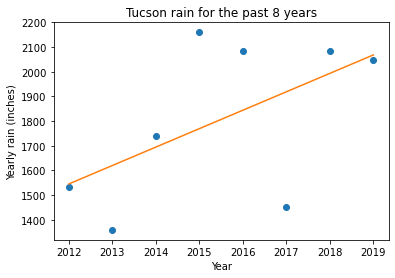

In [2]:
class Rain:
    def __init__(self, filename, sep, gauge_col="gaugeId", date_col="readingDate", rain_col="rainAmount", 
                 quality_col="quality", created_col="createdDate"):
        self.gauge_col, self.date_col  = gauge_col, date_col
        self.rain_col, self.quality_col= rain_col, quality_col
        self.created_col = created_col
        data=pd.read_csv(filename,sep=sep)
        data=data[data[quality_col].str.upper()=="GOOD"]
        data=data[data[created_col]<"2012-01-01"]
        self.__data__ = data
        
    def common_gauges (self, obj3, obj4, obj5, obj6, obj7, obj8, obj9):
        data2012=self.__data__
        data2013=obj3.__data__
        data2014=obj4.__data__
        data2015=obj5.__data__
        data2016=obj6.__data__
        data2017=obj7.__data__
        data2018=obj8.__data__
        data2019=obj9.__data__
        common=(set(data2012[self.gauge_col]).intersection(set(data2013[obj3.gauge_col])).intersection(set(data2014[obj4.gauge_col])).intersection(set(data2015[obj5.gauge_col])).intersection(set(data2016[obj6.gauge_col])).intersection(set(data2017[obj7.gauge_col])).intersection(set(data2018[obj8.gauge_col])).intersection(set(data2019[obj9.gauge_col])))
        common = pd.DataFrame({"Common gauges": common, "Number of common gauges": len(common)})
        list_cg = common["Common gauges"]
        common_gauges_list = pd.DataFrame(list_cg.loc[1])
        common_gauges_list = (pd.DataFrame(list_cg.loc[1])).rename(columns= {0 : "gaugeId"})
        return common_gauges_list
   
    def retrieve_rain(self):
        data=self.__data__
        data_new = pd.DataFrame(data)
        common_gauge_data = Rain.common_gauges(tucson_rain2012, tucson_rain2013, tucson_rain2014, tucson_rain2015, tucson_rain2016, tucson_rain2017, tucson_rain2018, tucson_rain2019)
        common_gauge_data_df = pd.DataFrame(common_gauge_data)
        merge_data = pd.merge(data_new, common_gauge_data_df)
        rain =merge_data[self.rain_col].sum()
        gauges =len(set(merge_data[self.gauge_col]))
        relative_amount = rain / gauges
        return pd.DataFrame({"Total amount of rain": rain, "Number of gauges": gauges, "Amount of rain per gauge": 
                             relative_amount}, index=[0])
            
            
    def regression(self, obj3, obj4, obj5, obj6, obj7, obj8, obj9):
        Rain_df = pd.concat([Rain.retrieve_rain(self), Rain.retrieve_rain(obj3), Rain.retrieve_rain(obj4), Rain.retrieve_rain(obj5), Rain.retrieve_rain(obj6), Rain.retrieve_rain(obj7), Rain.retrieve_rain(obj8), Rain.retrieve_rain(obj9)])
        rainAmount = pd.DataFrame(Rain_df["Total amount of rain"])
        rain_data = rainAmount.assign(year = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
        reg_data = rain_data.rename(columns = {"Total amount of rain":"Rain"})
        rain_glm=smf.glm(formula="Rain ~ year", 
                         data = reg_data, family = sm.families.Gaussian())
        res=rain_glm.fit()
        return res.summary()
    
    
    def visual(self, obj3, obj4, obj5, obj6, obj7, obj8, obj9):
        Rain_df = pd.concat([Rain.retrieve_rain(self), Rain.retrieve_rain(obj3), Rain.retrieve_rain(obj4), Rain.retrieve_rain(obj5), Rain.retrieve_rain(obj6), Rain.retrieve_rain(obj7), Rain.retrieve_rain(obj8), Rain.retrieve_rain(obj9)])
        Stats = Rain.regression(self, obj3, obj4, obj5, obj6, obj7, obj8, obj9)
        x=np.array([2012,2013,2014,2015,2016,2017,2018,2019])
        y=Rain_df["Total amount of rain"]
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, y, 'o')
        plt.plot(x, m*x + b)
        plt.xlabel("Year"); plt.ylabel("Yearly rain (inches)")
        plt.title("Tucson rain for the past 8 years")
        return{"Regression Analysis": Stats}
    

tucson_rain2012=Rain("tucson_rain_2012.txt", ",")
tucson_rain2013=Rain("tucson_rain_2013.txt", ",")
tucson_rain2014=Rain("tucson_rain_2014.txt", ",")
tucson_rain2015=Rain("tucson_rain_2015.txt", ",")
tucson_rain2016=Rain("tucson_rain_2016.txt", ",")
tucson_rain2017=Rain("tucson_rain_2017.txt", ",")
tucson_rain2018=Rain("tucson_rain_2018.txt", ",")
tucson_rain2019=Rain("tucson_rain_2019.txt", ",")

print(Rain.visual(tucson_rain2012, tucson_rain2013, tucson_rain2014, tucson_rain2015, tucson_rain2016, tucson_rain2017, tucson_rain2018, tucson_rain2019))